#Library import

In [120]:
pip install flask


In [16]:
pip install pipenv

In [17]:
pip install pymanopt


In [18]:
mkdir lab_1

In [19]:
cd lab_1

/content/lab_1/lab_1


In [123]:
import numpy as np
import sklearn
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import cv2

from sklearn.datasets import load_wine, load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy import linalg as LA
from PIL import Image
from matplotlib.image import imread
from matplotlib.lines import Line2D
from io import BytesIO



#1) Rectangular matrix inverse and eigenvalues/eigenvectors

In [21]:
# 1)
A = np.random.randint(100, size =(7,6))
A = np.matrix(A)
A

matrix([[62, 69, 75, 82, 30, 96],
        [53, 47, 41, 27, 23, 98],
        [82, 18, 79, 30, 58,  0],
        [ 3, 58, 41, 23, 54, 38],
        [55, 49, 86, 29, 24, 91],
        [56, 46, 27, 91, 14, 13],
        [12, 80, 99, 14, 36, 49]])

In [22]:
# Matrix rank
rank = np.linalg.matrix_rank(A)

print("The matrix range is:", rank)

The matrix range is: 6


Due to it being a non squared matrix, it's not possible to compute its determinant.

In [23]:
# Matrix trace
trace = np.trace(A)

print("The matrix trace is:", trace)

The matrix trace is: 248


Its inverse matrix cannot be computed neither. However, we can calculate a pseudo inverse of this matrix.

In [24]:
# Pseudo inverse
B = np.linalg.pinv(A)
B

matrix([[-0.01945358,  0.02398975,  0.00655668, -0.01081269, -0.0055047 ,
          0.0118772 ,  0.00559093],
        [-0.02634518,  0.02688623, -0.00483276, -0.00464742, -0.01316517,
          0.01953918,  0.02071244],
        [ 0.01222566, -0.02002906,  0.00214874, -0.00478162,  0.01047363,
         -0.0083063 ,  0.00256667],
        [ 0.02086777, -0.02099271, -0.00239062,  0.00568563,  0.00428937,
         -0.00194724, -0.01075701],
        [ 0.00696566, -0.00458097,  0.00741421,  0.02100105, -0.00288382,
         -0.00977817, -0.01282174],
        [ 0.00971696, -0.00076681, -0.00348065,  0.00410049,  0.00568837,
         -0.00892685, -0.00847128]])

To calculate the eigenvalues and eigenvectors of A, fisrt we have to calculate the transposed of A(AT)

In [25]:
# Transposed A
AT = A.T
AT

matrix([[62, 53, 82,  3, 55, 56, 12],
        [69, 47, 18, 58, 49, 46, 80],
        [75, 41, 79, 41, 86, 27, 99],
        [82, 27, 30, 23, 29, 91, 14],
        [30, 23, 58, 54, 24, 14, 36],
        [96, 98,  0, 38, 91, 13, 49]])

In [26]:
# A.AT
AAT = np.dot(A, AT)
AAT

matrix([[31070, 21916, 16451, 14417, 25075, 17801, 20621],
        [21916, 17561, 10575, 10153, 18997, 10290, 14463],
        [16451, 10575, 17553,  8351, 14448, 11095, 12753],
        [14417, 10153,  8351,  9943, 11954,  7286, 12863],
        [25075, 18997, 14448, 11954, 22520, 11814, 18823],
        [17801, 10290, 11095,  7286, 11814, 14627,  9440],
        [20621, 14463, 12753, 12863, 18823,  9440, 20238]])

In [27]:
# A*AT eigenvalues and eigenvectors
AAT_eigenvalues, AAT_eigenvectors = np.linalg.eig(AAT)

print("A*AT eigenvalues:", AAT_eigenvalues, "\nshape:", AAT_eigenvalues.shape, "\n")

print("A*AT eigenvectors:", AAT_eigenvectors, "\nshape:", AAT_eigenvectors.shape, "\n")

A*AT eigenvalues: [ 1.09961218e+05  9.83037972e+03  7.76925484e+03  4.39659582e+03
  1.37354103e+03 -1.76331960e-12  1.81010560e+02] 
shape: (7,) 

A*AT eigenvectors: [[-0.52133482 -0.06184008  0.36679081  0.08593662 -0.08635331 -0.50404303
  -0.56652356]
 [-0.37087727  0.23888659  0.36598136 -0.3591      0.3832004  -0.18274006
   0.60187341]
 [-0.3150517  -0.53995673 -0.61781126 -0.41630142  0.18099783 -0.14589615
  -0.01206739]
 [-0.26190517  0.19471636 -0.20822481  0.47316027  0.71347473  0.27819051
  -0.19954163]
 [-0.43936788  0.2281714   0.04003035 -0.38312264 -0.28829306  0.68869307
  -0.22157903]
 [-0.28655393 -0.64205723  0.2939558   0.43209254 -0.15149908  0.30080966
   0.34510428]
 [-0.38425366  0.38123692 -0.46739852  0.36467472 -0.44478005 -0.22155464
   0.32961   ]] 
shape: (7, 7) 



In [28]:
# AT.A
ATA = np.dot(AT, A)
ATA

matrix([[19691, 14650, 20854, 15903, 10533, 17581],
        [14650, 21575, 24278, 15528, 12027, 22411],
        [20854, 24278, 33154, 16907, 15995, 25804],
        [15903, 15528, 16907, 18200,  8537, 15900],
        [10533, 12027, 15995,  8537,  9777, 11316],
        [17581, 22411, 25804, 15900, 11316, 31115]])

In [29]:
# AT*A eigenvalues and eigenvectors
ATA_eigenvalues, ATA_eigenvectors = np.linalg.eig(ATA)

print("AT*A eigenvalues:", ATA_eigenvalues, "\nshape:", ATA_eigenvalues.shape, "\n")

print("AT*A eigenvectors:", ATA_eigenvectors, "\nshape:", ATA_eigenvectors.shape, "\n")

AT*A eigenvalues: [109961.21803278   9830.37971584   7769.25484294   4396.59581868
    181.01055998   1373.54102979] 
shape: (6,) 

AT*A eigenvectors: [[-3.72198477e-01 -5.41576092e-01  4.43284187e-02 -5.86967155e-01
   4.66848857e-01  6.09944689e-02]
 [-4.21332556e-01  2.08574004e-01 -2.94563176e-02  5.92382737e-01
   6.53598226e-01  3.72738560e-04]
 [-5.23205322e-01  1.06030937e-01 -5.64112685e-01 -1.04745555e-01
  -3.01291352e-01 -5.43178055e-01]
 [-3.39067491e-01 -5.73021535e-01  4.31139750e-01  4.38266410e-01
  -4.13452116e-01 -8.81928261e-02]
 [-2.56256901e-01 -7.01149515e-02 -4.47068583e-01  8.60637243e-02
  -2.41433601e-01  8.14769187e-01]
 [-4.79133592e-01  5.64517384e-01  5.41472431e-01 -3.06751056e-01
  -1.86687407e-01  1.72076533e-01]] 
shape: (6, 6) 



Regarding the eigenvalues and eigenvectors of AAT and ATA we can see how both eigenvalues are the same, the only difference is their dimensions since both have a different amount of rows.

However, the eigenvectors are different from each other, both retaining the AAT and ATA dimensions respectively.

#2) Average image

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(256, 256)


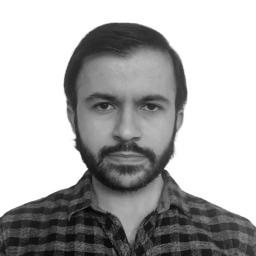

In [33]:
# 2) Moddifing photo to match 256 x 256 pixels and only grayscale
img = Image.open("/content/drive/MyDrive/Fotos Procesadas/Face_pic/esteban_j.jpg")
modded_img = img.resize((256, 256))
modded_img = modded_img.convert('L')
modded_img.save('esteban_j.jpg')

print(modded_img.size)

modded_img

In [34]:
# Creating a matrix with all grayscale photos
folder_path = "/content/drive/MyDrive/Fotos Procesadas/"
image_list = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        image = Image.open(os.path.join(folder_path, filename))
        # Resize the image to ensure it's 256x256
        image = image.resize((256, 256))
        image_array = np.array(image)
        # Check if the image shape matches the desired dimensions
        if image_array.shape == (256, 256):
            image_list.append(image_array)

image_matrix = np.stack(image_list, axis=0)

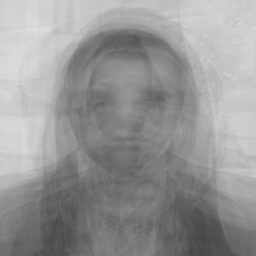

In [35]:
# Creating average image
average_img = np.mean(image_matrix, axis=0).astype(np.uint8)
average_img = Image.fromarray(average_img, mode='L')
average_img.save('average_image.png')
average_img

To measure how distant my photo is from the average image, MAE and MSE will be used.

In [36]:
# Converting again both images to array
original_array = np.array(modded_img)
average_array = np.array(average_img)

# Computing (MSE)
mse = np.mean((original_array - average_array) ** 2)

# Computing (MAE)
mae = np.mean(np.abs(original_array - average_array))

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 113.70712280273438
MAE: 110.16876220703125


The results above show a considerable difference between both.

#3) Unsupervised Python packages

In [37]:
# First, let's load a test dataset
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


##SVD

In [38]:
class SVD:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, X):
        # Compute the mean of the data
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Compute the SVD
        self.U, self.S, self.Vt = np.linalg.svd(X_centered, full_matrices=False)

        # Keep only the first n_components singular values/vectors
        self.U = self.U[:, :self.n_components]
        self.S = self.S[:self.n_components]
        self.Vt = self.Vt[:self.n_components]

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the first n_components singular vectors
        X_transformed = np.dot(X_centered, self.Vt.T)

        return X_transformed

(178, 3)


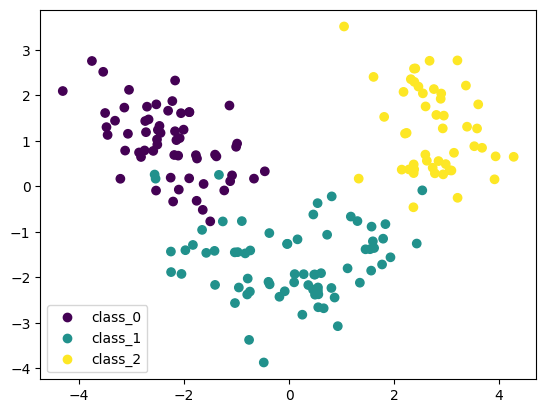

In [39]:
# create a SVD object with 3 components
svd = SVD(n_components=3)

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply SVD now
svd.fit(X_normalised)

# transform the data using the PCA object
X_transformed = svd.transform(X_normalised)

print(X_transformed.shape)

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

## PCA

In [40]:
# PCA
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed

(178, 3)


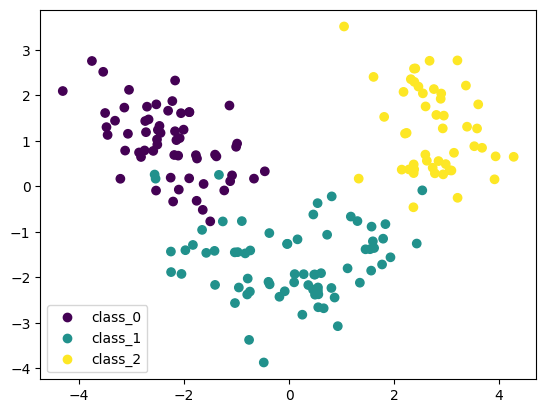

In [41]:
# create a PCA object with 3 components
pca = PCA(n_components=3)

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed = pca.transform(X_normalised)

print(X_transformed.shape)

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

##t-SNE

In [42]:
class TSNE:
    def __init__(self, n_components=2, perplexity=30.0, learning_rate=200.0, n_iterations=1000):
        self.n_components = n_components
        self.perplexity = perplexity
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X):
        n_samples, n_features = X.shape

        # Compute pairwise distances (squared Euclidean distances)
        pairwise_distances = np.sum((X[:, np.newaxis] - X) ** 2, axis=-1)

        # Initialize low-dimensional representations randomly
        np.random.seed(0)
        Y = np.random.randn(n_samples, self.n_components)

        # Symmetrize the pairwise similarities using a Student's t-distribution
        P = self.compute_pairwise_similarities(pairwise_distances)

        # Initialize Q matrix
        Q = np.zeros((n_samples, n_samples))

        # Gradient descent for optimization
        for iteration in range(self.n_iterations):
            # Compute Q matrix
            Q = self.compute_q_matrix(Y)

            # Update low-dimensional representations Y using gradient descent
            grad = self.compute_gradient(P, Q, Y)

            # Apply gradient clipping to prevent extreme updates
            grad_clip = np.clip(grad, -1, 1)  # Adjust the clipping range as needed
            Y -= self.learning_rate * grad_clip

        self.embedding_ = Y
        return self.embedding_

    def compute_pairwise_similarities(self, pairwise_distances):
        # Compute conditional probabilities Pj|i
        P = np.zeros_like(pairwise_distances, dtype=np.float64)

        for i in range(len(P)):
            # Compute conditional probabilities Pj|i using binary search
            betas = np.ones(len(P[i]))
            sigmas = np.std(pairwise_distances[i])
            low_beta = 1e-10
            high_beta = np.inf

            for _ in range(50):  # Binary search
                current_beta = (low_beta + high_beta) / 2
                P[i] = np.exp(-pairwise_distances[i] / (2.0 * (sigmas**2)))
                sum_Pi = np.sum(P[i]) - P[i][i]
                P[i] /= sum_Pi

                # Adjust betas based on whether sum_Pi is less or greater than perplexity
                if sum_Pi < self.perplexity:
                    low_beta = current_beta
                else:
                    high_beta = current_beta

        return P

    def compute_q_matrix(self, Y):
        # Compute Q matrix (low-dimensional similarities)
        n_samples, _ = Y.shape
        Q = np.zeros((n_samples, n_samples))

        # Compute pairwise squared Euclidean distances in the low-dimensional space
        pairwise_distances = np.sum((Y[:, np.newaxis] - Y) ** 2, axis=-1)

        for i in range(len(Q)):
            # Compute Qij using the t-distribution formula
            Q[i] = 1.0 / (1.0 + pairwise_distances[i] / (2.0))

        # Normalize Q
        Q /= np.sum(Q)
        return Q

    def compute_gradient(self, P, Q, Y):
        # Compute gradient of the cost function with respect to Y
        grad = np.zeros_like(Y)

        for i in range(len(Y)):
            grad_diff = P[i] - Q[i]
            grad_diff_tile = np.tile(grad_diff, (self.n_components, 1)).T
            grad[i] = 4.0 * np.sum(grad_diff_tile * (Y[i] - Y), axis=0)

        return grad


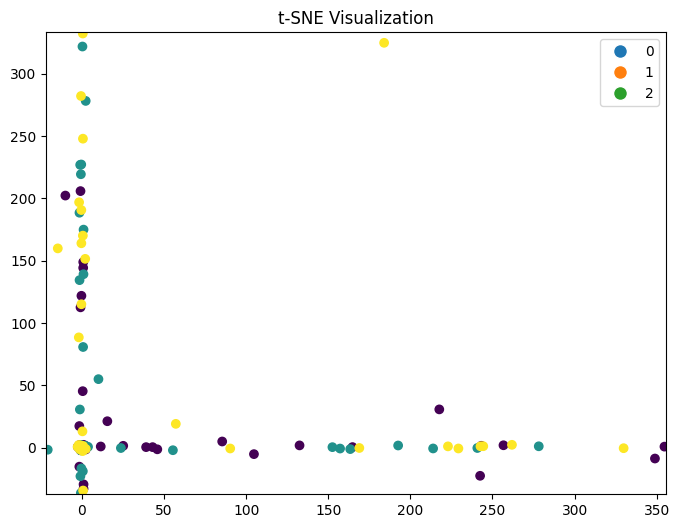

In [43]:
# Create a t-SNE object with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, perplexity=30.0, learning_rate=200.0, n_iterations=1000)

# Normalize the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply t-SNE
X_transformed = tsne.fit(X_normalised)

# Create a scatter plot with color-coded points
plt.figure(figsize=(8, 6))
plot = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')

# Get unique class labels from 'y'
class_labels = np.unique(y)

# Create a legend with class labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor='C{}'.format(i))
                   for i, label in enumerate(class_labels)]

# Manually set the axis limits to cover the data points
plt.xlim(X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1)
plt.ylim(X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1)

plt.legend(handles=legend_elements)

plt.show()

#4) Applied SVD on face picture

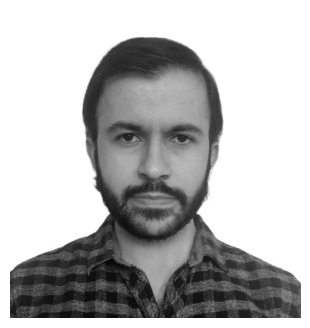

In [44]:
#Reading our image and setting the size and color
plt.rcParams['figure.figsize'] = [8, 4]

# Another way to grayscale the photo
A = img
X = np.mean(A, -1)
big_grayscale_img = plt.imshow(X)
big_grayscale_img.set_cmap('gray')
plt.axis('off')
plt.show()

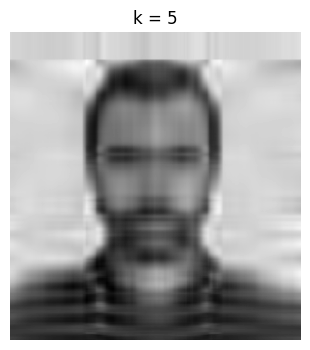

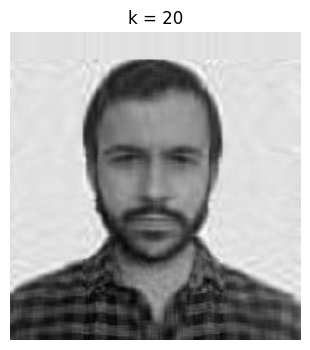

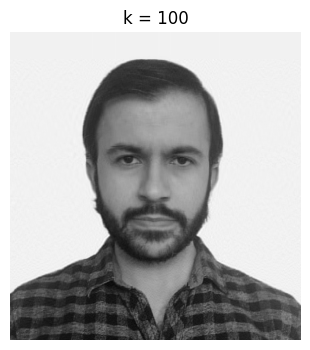

In [45]:
# Computing SVD
U, S, VT = np.linalg.svd(X, full_matrices = False)

# Extract Diagonal Singular Values from the Sigma Matrix
S = np.diag(S)

i = 0
for k in (5, 20, 100):
    #Constructing the approximate images in the setted ranks
    X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(i+1)
    i += 1
    approximated_img = plt.imshow(X_Ap)
    approximated_img.set_cmap('gray')
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show()

The third photo is a good approximation. To calculate how close it is to the original, we can use MSE and MAE once again.

In [46]:
# Converting again both images to array
original_array = np.array(X)
approximated_array = np.array(X_Ap)

# Computing (MSE)
mse = np.mean((original_array - approximated_array) ** 2)

# Computing (MAE)
mae = np.mean(np.abs(original_array - approximated_array))

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 13.78666203964021
MAE: 2.326071790876132


The vaules obtained for both metrics indicate the compressed image when K=100 is a good approximation of the original photo (also in grayscale).

#5) Logistic Regression (MNIST)

In [47]:
mnist = load_digits(return_X_y=False)
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [48]:
y = pd.DataFrame(mnist.target)
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [49]:
X = pd.DataFrame(mnist.data)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [50]:
y_sub = y[y[0].isin([0,8])]
y_sub

,0
0,0
8,8
10,0
18,8
20,0
...,...
1789,8
1790,8
1793,0
1794,8


In [51]:
X_sub = X.iloc[y_sub.index]
X_sub

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

In [53]:
y_train

,0
1279,8
1667,0
1069,8
1323,0
79,0
...,...
357,0
534,8
1365,0
1790,8


In [54]:
y_train.squeeze().shape

(264,)

In [55]:
X_train.shape

(264, 64)

In [56]:
model = LogisticRegression()
model

LogisticRegression()

In [57]:
model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [58]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8])

In [59]:
accuracy_score(y_test, y_pred)

1.0

The result of the previous accuracy test can be deceiving. In fact, this is a case of overfitting due to how the data used to train and test the model was selected. Note both training and test data were selected after filtering the original dataset to only distinguish the digits 0 and 8. As a consecuense, if we use a different test data including any digit besides 0 and 8, the accuracy score score will probably be way closer to zero. Let's see:

In [60]:
# Defining new test data including any digit
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# Using the new test data to predict "y" using the same trained model as before
y_pred_2 = model.predict(X_test_2)
y_pred_2

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 0, 8, 8, 0, 8, 0, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       0, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 8, 8, 8,
       8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 0, 8, 8, 0, 8, 0,
       8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 0, 8, 8,
       8, 8, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 0, 8,

In [62]:
accuracy_score(y_test_2, y_pred_2)

0.18

The accuracy score is indeed way closer to cero. The model is overfitted.

#6) MNIST dimensionality reduction (2 feautres per image)

##SVD

In [63]:
mnist_X = pd.DataFrame(mnist.data)
mnist_y = pd.DataFrame(mnist.target)

(1797, 2)


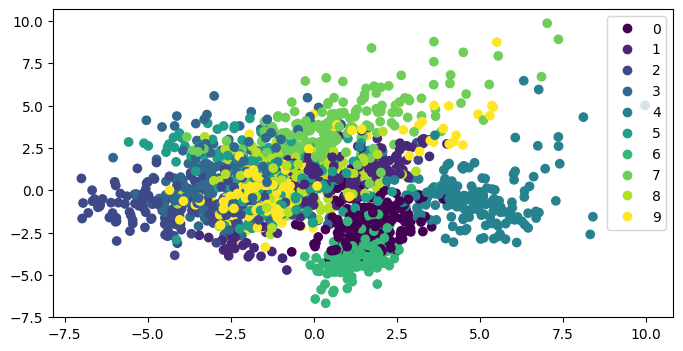

In [64]:
# create a SVD object with 2 components
svd = SVD(n_components=2)

# Normalise the data
scaler = StandardScaler()
scaler.fit(mnist_X)
X_normalised = scaler.transform(mnist_X)

# Apply SVD now
svd.fit(X_normalised)

# transform the data using the PCA object
X_transformed = svd.transform(X_normalised)

print(X_transformed.shape)

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(mnist_y[0]))

plt.show()

In [65]:
# Changing the transformed data to a DataFrame object
X_SDV = pd.DataFrame(X_transformed)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_SDV.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [66]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 0, 0, 8, 8, 0, 8, 8, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8])

In [67]:
accuracy_score(y_test, y_pred)

0.9204545454545454

##PCA

In [68]:
mnist_X = pd.DataFrame(mnist.data)
mnist_y = pd.DataFrame(mnist.target)

(1797, 2)


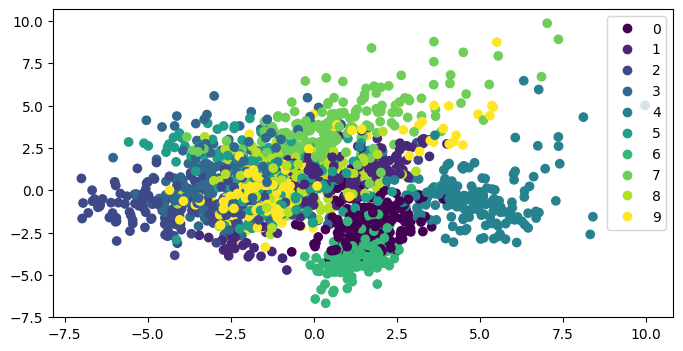

In [69]:
# create a PCA object with 2 components
pca = PCA(n_components=2)

# Normalise the data
scaler = StandardScaler()
scaler.fit(mnist_X)
X_normalised = scaler.transform(mnist_X)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed = pca.transform(X_normalised)

print(X_transformed.shape)

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(mnist_y[0]))

plt.show()

In [70]:
# Changing the transformed data to a DataFrame object
X_PCA = pd.DataFrame(X_transformed)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_PCA.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 0, 0, 8, 8, 0, 8, 8, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8])

In [72]:
accuracy_score(y_test, y_pred)

0.9204545454545454

##t-SNE

In [73]:
mnist_X = pd.DataFrame(mnist.data)
mnist_y = pd.DataFrame(mnist.target)

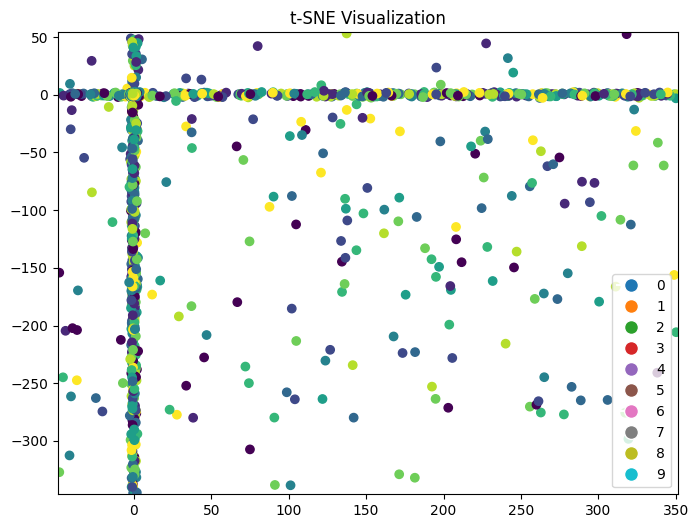

In [74]:
# Creating a t-SNE object with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, perplexity=30.0, learning_rate=200.0, n_iterations=1000)

# Normalize the data
scaler = StandardScaler()
scaler.fit(mnist_X)
X_normalised = scaler.transform(mnist_X)

# Apply t-SNE
X_transformed = tsne.fit(X_normalised)

# Create a scatter plot with color-coded points
plt.figure(figsize=(8, 6))
plot = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')

# Get unique class labels from 'y'
class_labels = np.unique(y)

# Create a legend with class labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor='C{}'.format(i))
                   for i, label in enumerate(class_labels)]

# Manually set the axis limits to cover the data points
plt.xlim(X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1)
plt.ylim(X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1)

plt.legend(handles=legend_elements)

plt.show()

In [75]:
# Changing the transformed data to a DataFrame object
X_tSNE = pd.DataFrame(X_transformed)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_tSNE.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [76]:
y_pred = model.predict(X_test)
y_pred

array([8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 8, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 0, 8, 0, 8, 8,
       8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 0, 8, 8, 0, 8, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 8])

In [77]:
accuracy_score(y_test, y_pred)

0.48863636363636365

Considering the accuracy scores obteained for the 3 dimensionality algorithms used, we can notice how the overall accuracy decreased when compared to the model trained with raw MNIST data. This could be due to a loss of the explained variance when transforming the data in 2 components (algorthms PCA, SVD).

Another point worth noting is how in this case the accuracy score obtained after applying both PCA and SVD are exactly the same. This could be due to the fact that both algorithms have a similar approach (eigenvalues/eigenvectors) in contrast to t-SNE which have a probabilistic foundation and in this particular case, judging from the model performance, may not be the best to work with.

#7) Using Scikit-Learn libraries

In [78]:
# Loading and standardizing data
mnist_X = pd.DataFrame(mnist.data)
mnist_y = pd.DataFrame(mnist.target)

scaler = StandardScaler()
mnist_X_scaled = scaler.fit_transform(mnist_X)

##SVD

In [98]:
from sklearn.decomposition import PCA, TruncatedSVD

svd = TruncatedSVD(n_components=2)
mnist_svd = svd.fit_transform(mnist_X_scaled)

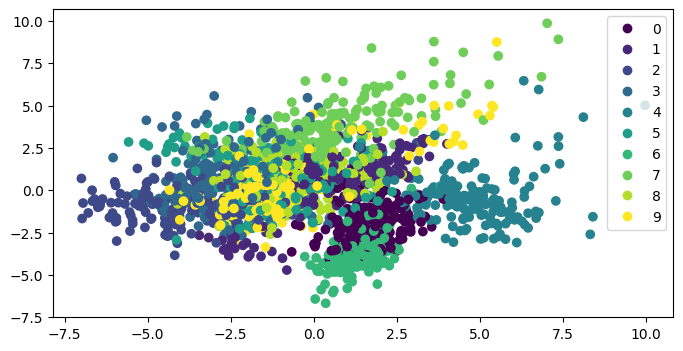

In [99]:
plot = plt.scatter(mnist_svd[:,0], mnist_svd[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(mnist_y[0]))

plt.show()

In [100]:
# Changing the transformed data to a DataFrame object
X_SDV = pd.DataFrame(mnist_svd)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_SDV.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [101]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 0, 0, 8, 8, 0, 8, 8, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8])

In [102]:
accuracy_score(y_test, y_pred)

0.9204545454545454


##PCA

In [103]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_X_scaled)

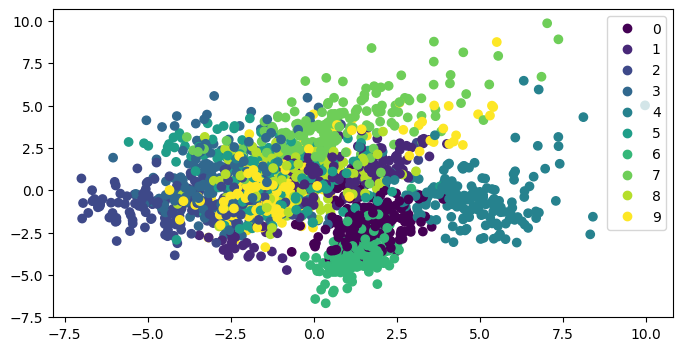

In [104]:
plot = plt.scatter(mnist_pca[:,0], mnist_svd[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(mnist_y[0]))

plt.show()

In [105]:
# Changing the transformed data to a DataFrame object
X_PCA = pd.DataFrame(mnist_pca)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_PCA.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [106]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 0, 0, 8, 8, 0, 8, 8, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8])

In [107]:
accuracy_score(y_test, y_pred)

0.9204545454545454

##t-SNE

In [108]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
mnist_tsne = tsne.fit_transform(mnist_X_scaled)

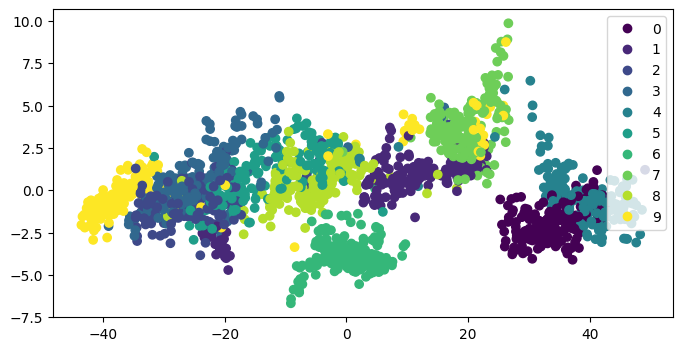

In [109]:
plot = plt.scatter(mnist_tsne[:,0], mnist_svd[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(mnist_y[0]))

plt.show()

In [110]:
# Changing the transformed data to a DataFrame object
X_TSN = pd.DataFrame(mnist_tsne)

# Training the model with just 2 components
y_sub = mnist_y[mnist_y[0].isin([0,8])]
X_sub = X_TSN.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train.squeeze())

LogisticRegression()

In [111]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8])

In [112]:
accuracy_score(y_test, y_pred)

1.0

From the results obstained from the accuracy tests above, we can note:

-Both PCA and SVD algorithms had the exact same results (using numpy and scikit learn).

-tSNT algorithms had a significant improvement in regards of the model performance. However, an accuracy score of 1 is certainly a symptom of overfitting. The reason behind this is, as expected, that scikit learn library had a more robost built-in algorithm, and the amount of data choosen to train the logistic regression model.

#8) Robust Principal Component Analysis (RPCA)

There is a way to improve the PCA algorithm, by making it less prone to be afected by outliers.

This algorithm decomposes a matrix M into L (low rank matrix) and S (countaining noise or outliers).

RPCA uses optimization techniques to find the optimal values of L and S that best fit the input matrix M.

Once the decomposition is obtained, you can use the low-rank matrix L for various tasks, such as background modeling, denoising, or feature extraction.
The sparse matrix S can be used to identify and isolate outliers or anomalies in the data.

Here is an example of its implementation:

#9) UMAP (Uniform Manifold Approximation and Projection)

UMAP is based on the mathematical framework of Riemannian geometry and algebraic topology. It constructs a topological representation of data points and tries to preserve the underlying manifold's structure. UMAP uses a combination of k-nearest neighbors and fuzzy set theory to model this manifold.

UMAP is useful for nonlinear dimensionality reduction and visualization of high-dimensional data. It aims to preserve both local and global structure, making it effective for various tasks such as clustering, visualization, and exploration of complex data.

#10) LDA (Linear Discriminant Analysis)

LDA is a linear transformation technique that maximizes the separation between classes by projecting data points onto a lower-dimensional space. It finds a linear combination of features that maximizes the ratio of the between-class variance to the within-class variance. The result is a set of linear discriminant axes.

LDA is primarily used for supervised dimensionality reduction and classification. It aims to find a projection that best separates classes, making it suitable for tasks like classification, feature extraction, and reducing the dimensionality of data while preserving class separability.






